___
# PROJETO 2

## Felipe Giorgi Vaz Guimarães
___

In [38]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Felipe Giorgi\Desktop\3° Semestre\DP - Ciência dos Dados\CD1S17\Projeto 2


In [39]:
dados = pd.read_excel('Life.xlsx')

In [40]:
dados.head()

,Life expectancy with projections. Yellow is IHME,A1800,A1801,A1802,A1803,A1804,A1805,A1806,A1807,A1808,...,A2004,A2005,A2006,A2007,A2008,A2009,A2010,A2011,A2012,A2013
0,Afghanistan,28.2110,28.200753,28.190507,28.18026,28.170013,28.159767,28.14952,28.139273,28.129027,...,52.5,52.9,53.2,53.6,54.0,54.5,54.8,55.2,55.5,56.2
1,Albania,35.4000,35.400000,35.400000,35.40000,35.400000,35.400000,35.40000,35.400000,35.400000,...,74.4,74.4,74.5,74.7,74.9,75.0,75.2,75.5,75.7,75.8
2,Algeria,28.8224,28.822400,28.822400,28.82240,28.822400,28.822400,28.82240,28.822400,28.822400,...,74.2,74.5,74.8,75.0,75.3,75.6,75.9,76.1,76.2,76.3
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,83.0,83.1,83.2,83.4,83.5,83.6,83.7,83.8,83.8,83.9


___
## Seleção dos três anos com diferentes formatos de distribuição da expectativa de vida

In [41]:
dados = dados.dropna(subset = ['A1820', 'A1950', 'A2005'])

In [42]:
dd = pd.DataFrame()

In [43]:
dd['A1820'] = sorted(dados.A1820)
dd['A1950'] = sorted(dados.A1950)
dd['A2005'] = sorted(dados.A2005)

In [44]:
dd.describe()

,A1820,A1950,A2005
count,201.000000,201.000000,201.000000
mean,31.560647,48.872032,69.325070
std,4.454171,11.967221,9.127824
min,6.500000,23.387000,43.500000
25%,29.000000,39.418000,62.600000
50%,31.800000,48.556000,72.200000
75%,34.050000,58.419000,76.300000
max,46.962398,71.600000,82.200000


___
### Análise Descritiva

In [45]:
print('Medidas resumo para o ano de 1820:')
dd.A1820.describe()

Medidas resumo para o ano de 1820:


count    201.000000
mean      31.560647
std        4.454171
min        6.500000
25%       29.000000
50%       31.800000
75%       34.050000
max       46.962398
Name: A1820, dtype: float64

In [46]:
print('Medidas resumo para o ano de 1950:')
dd.A1950.describe()

Medidas resumo para o ano de 1950:


count    201.000000
mean      48.872032
std       11.967221
min       23.387000
25%       39.418000
50%       48.556000
75%       58.419000
max       71.600000
Name: A1950, dtype: float64

In [47]:
print('Medidas resumo para o ano de 2005:')
dd.A2005.describe()

Medidas resumo para o ano de 2005:


count    201.000000
mean      69.325070
std        9.127824
min       43.500000
25%       62.600000
50%       72.200000
75%       76.300000
max       82.200000
Name: A2005, dtype: float64

In [48]:
faixa = np.arange(10,90,5)

As médias só aumentaram com o passar dos anos, mas a maior diferença estão nas expectativas minimas e maximas

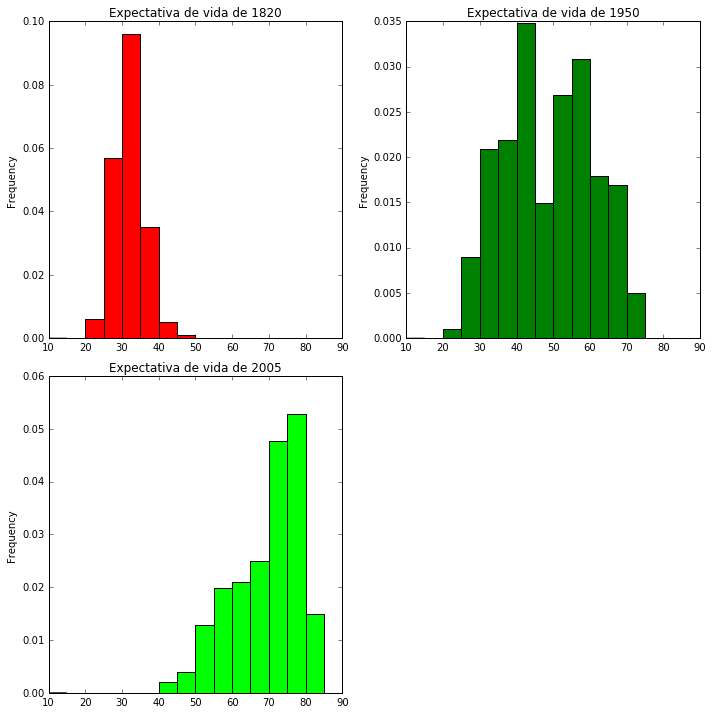

In [110]:
plt.subplot(221)
plot = dd.A1820.plot.hist(bins=faixa, title='Expectativa de vida de 1820', figsize=(10, 10), color="red", alpha=1, normed = 1)

plt.subplot(222)
plot = dd.A1950.plot.hist(bins=faixa, title='Expectativa de vida de 1950', figsize=(10, 10), color="green", alpha=1, normed = 1)

plt.subplot(223)
plot = dd.A2005.plot.hist(bins=faixa, title='Expectativa de vida de 2005', figsize=(10, 10), color="lime", alpha=1, normed = 1)


plt.tight_layout()
plt.show()


Os histogramas mudaram bastante, enquanto que em 1820 o histograma nos mostra uma expectativa de vida muito baixa, em 2005 a expectativa é muito alta. Outra coisa que mudou foi a simetria, em 2005 o histograma é assimetrico pra direita enquanto que nos outros anos o histograma é simetrico.

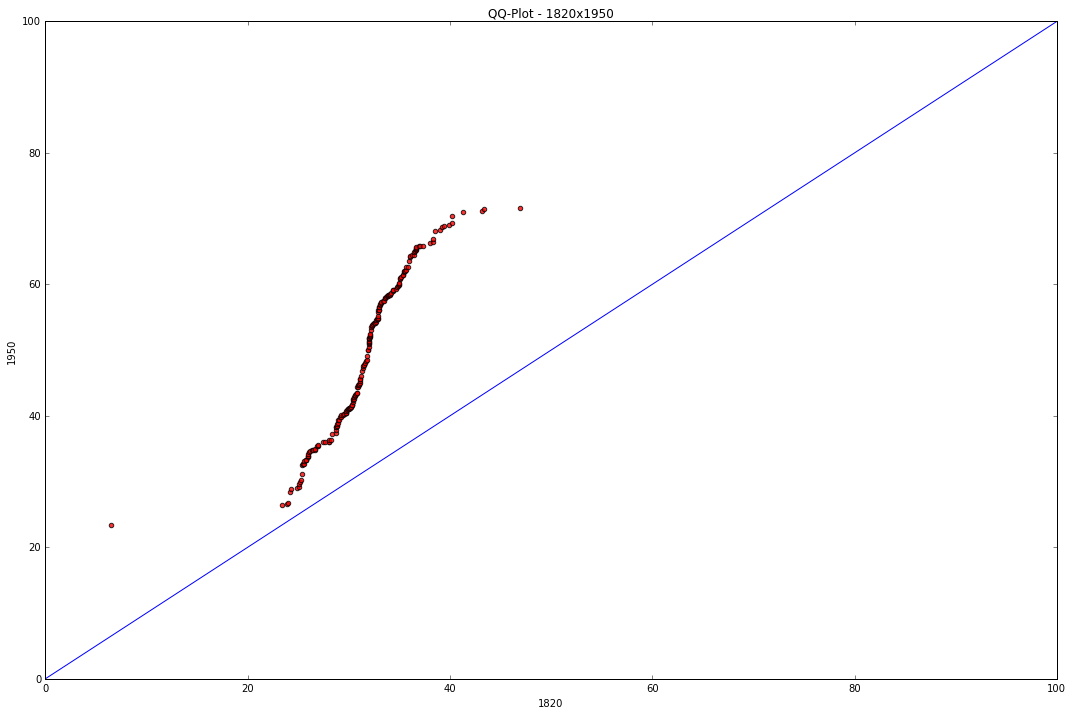

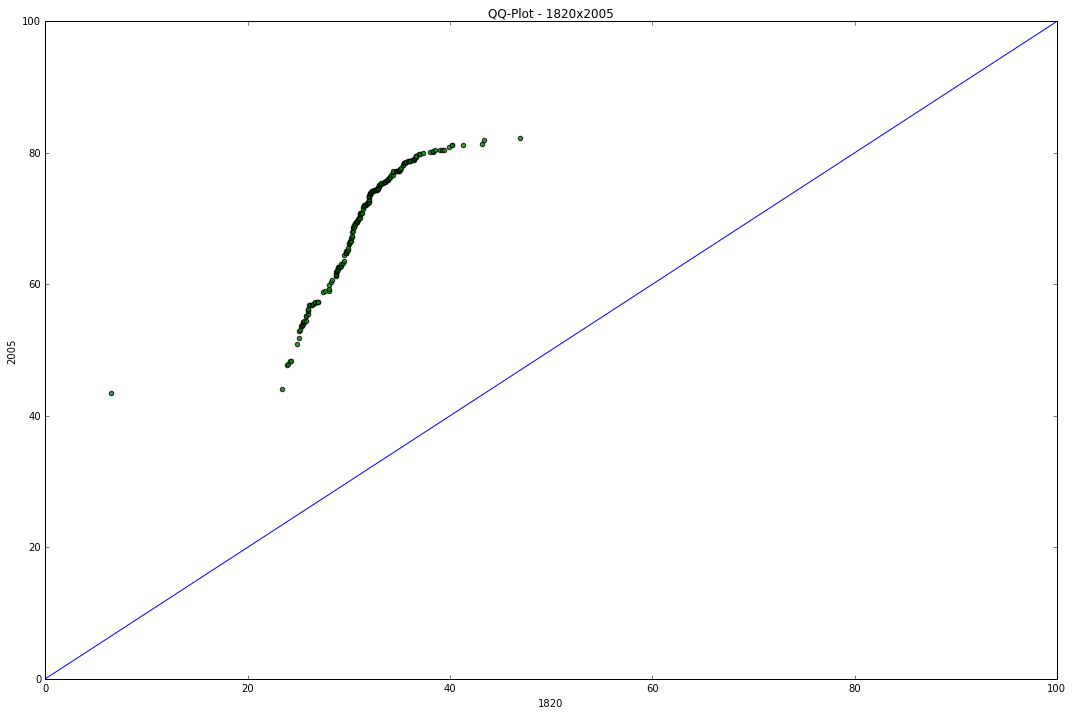

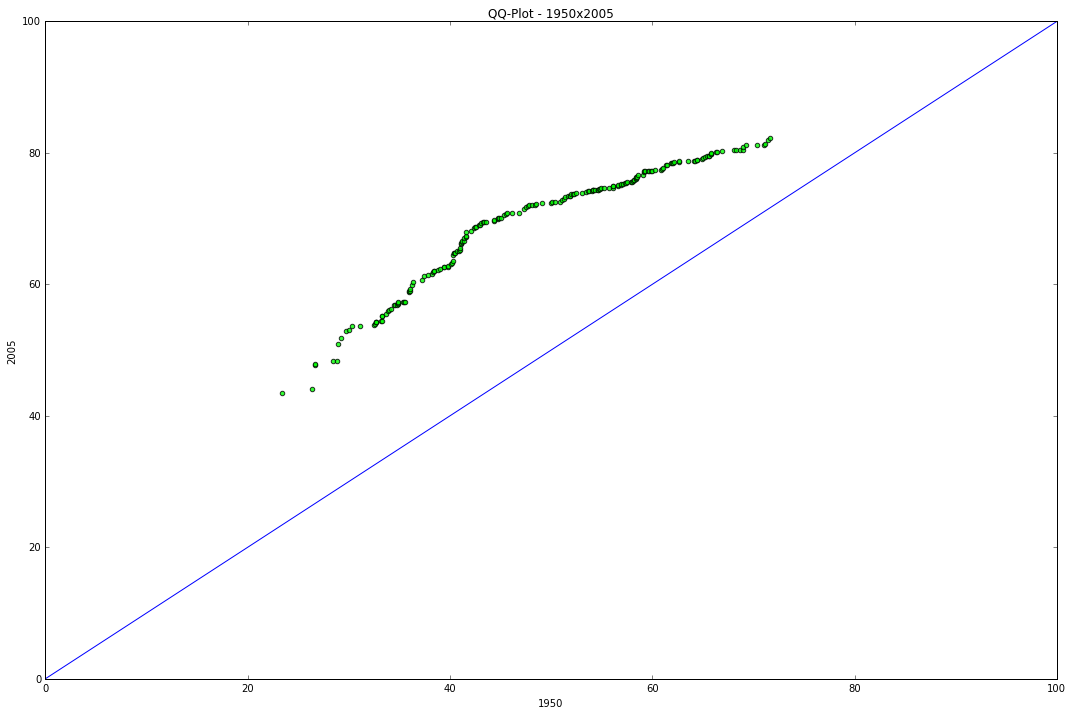

In [50]:
plt.figure(figsize = (15,10))
plt.scatter(dd.A1820, dd.A1950, c='red', alpha=0.8)
plt.plot((0,100),(0,100))
plt.title('QQ-Plot - 1820x1950')
plt.axis([0,100,0,100])
plt.xlabel('1820')
plt.ylabel('1950')
plt.tight_layout()
plt.show()

plt.figure(figsize = (15,10))
plt.scatter(dd.A1820, dd.A2005, c='green', alpha=0.8)
plt.plot((0,100),(0,100))
plt.title('QQ-Plot - 1820x2005')
plt.axis([0,100,0,100])
plt.xlabel('1820')
plt.ylabel('2005')
plt.tight_layout()
plt.show()

plt.figure(figsize = (15,10))
plt.scatter(dd.A1950, dd.A2005, c='lime', alpha=0.8)
plt.plot((0,100),(0,100))
plt.title('QQ-Plot - 1950x2005')
plt.axis([0,100,0,100])
plt.xlabel('1950')
plt.ylabel('2005')
plt.tight_layout()
plt.show()

Com esses gráficos é possivel perceber a evolução das expectativas de vida, isto porque em todos os eixos Y estão os maiores anos e, já que os pontos estão todos acima da reta bissetriz, pode se concluir que a expectativa mudou ao longo dos anos

### Aderência de um modelo probabilístico normal aos dados

In [51]:
med1820 = dd.A1820.mean()
med1950 = dd.A1950.mean()
med2005 = dd.A2005.mean()

sigma1820 = (dd.A1820.var())**0.5
sigma1950 = (dd.A1950.var())**0.5
sigma2005 = (dd.A2005.var())**0.5

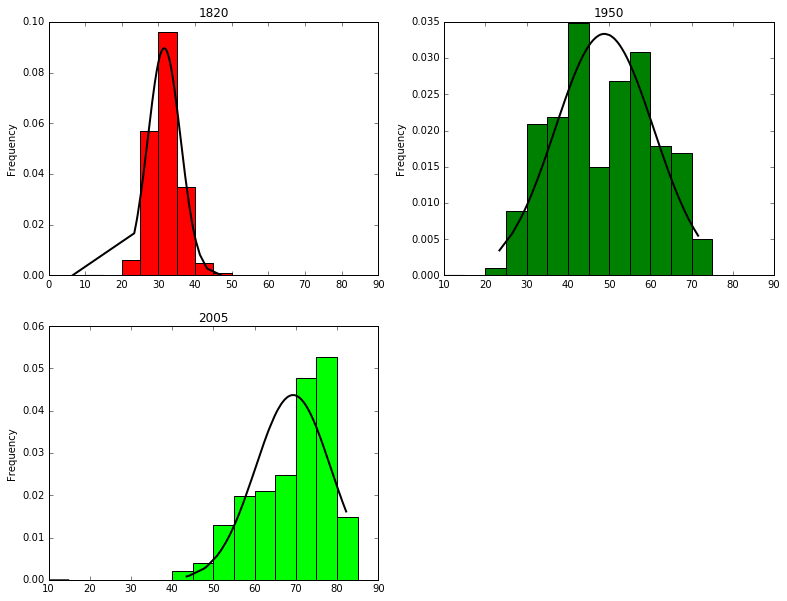

In [52]:
plt.subplot(221)
plot = dd.A1820.plot.hist(bins = faixa, title = '1820', figsize = (13, 10), alpha = 1, color = 'red', normed = 1)
plt.plot(dd.A1820, stats.norm.pdf(dd.A1820, loc = med1820, scale = sigma1820), lw = 2, alpha = 1, color = 'black')

plt.subplot(222)
plot = dd.A1950.plot.hist(bins = faixa, title = '1950', figsize = (13, 10), alpha = 1, color = 'green', normed = 1)
plt.plot(dd.A1950, stats.norm.pdf(dd.A1950, loc = med1950, scale = sigma1950), lw = 2, alpha = 1, color = 'black')

plt.subplot(223)
plot = dd.A2005.plot.hist(bins = faixa, title = '2005', figsize = (13, 10), alpha = 1, color = 'lime', normed = 1)
plt.plot(dd.A2005, stats.norm.pdf(dd.A2005, loc = med2005, scale = sigma2005), lw = 2, alpha = 1, color = 'black')

Com estes histogramas é possivel observar que a expectativa de vida pode ser bem modelada por uma reta normal. Mas, além do ano 1820, a reta normal não segue muito bem o histograma, no ano 1950 o ponto máximo esta fora do lugar e não coincide com a reta normal e no ano 2005 a reta normal esta um pouco deslocada.

In [53]:
fae = []
for i in range(1,202):
    fae.append((i-0.5)/201)

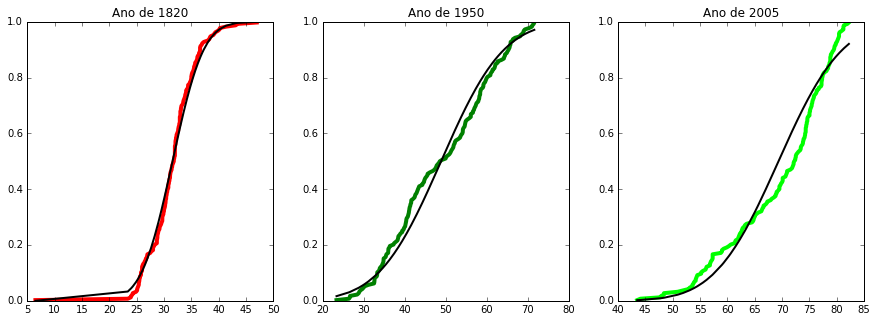

In [54]:
matriz = plt.figure(figsize=(15,5)) 

plt.subplot(131)
plt.title("Ano de 1820")
plt.plot(dd.A1820, fae, lw=4, color="red")
plt.plot(dd.A1820, stats.norm.cdf(dd.A1820, med1820, sigma1820), lw=2, color="black")

plt.subplot(132)
plt.title("Ano de 1950")
plt.plot(dd.A1950, fae, lw=4, color="green")
plt.plot(dd.A1950, stats.norm.cdf(dd.A1950, med1950, sigma1950), lw=2, color="black")

plt.subplot(133)
plt.title("Ano de 2005")
plt.plot(dd.A2005, fae, lw=4, color="lime")
plt.plot(dd.A2005, stats.norm.cdf(dd.A2005, med2005, sigma2005), lw=2, color="black")
plt.show()

Neste caso, os pontos da expectativa de vida acompanha bem a reta normal, mas os erros aumentam quando o ano aumenta.

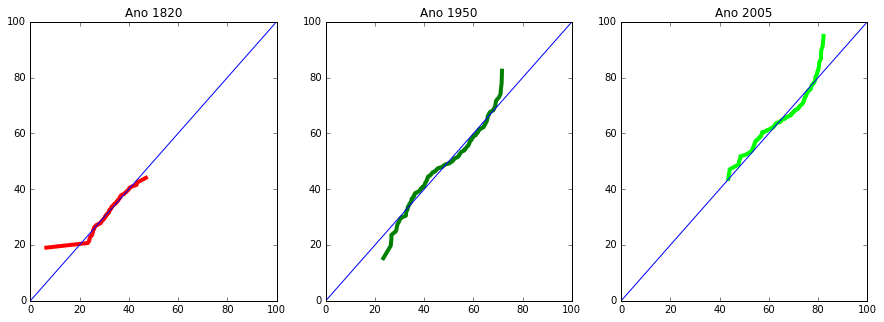

In [55]:
matriz = plt.figure(figsize = (15,5))

plt.subplot(131)
plt.plot(dd.A1820, stats.norm.ppf(fae, loc = med1820, scale = sigma1820), lw=4, color="red")
plt.plot((0,100),(0,100))
plt.title('Ano 1820')

plt.subplot(132)
plt.plot(dd.A1950, stats.norm.ppf(fae, loc = med1950, scale = sigma1950), lw=4, color="green")
plt.plot((0,100),(0,100))
plt.title('Ano 1950')

plt.subplot(133)
plt.plot(dd.A2005, stats.norm.ppf(fae, loc = med2005, scale = sigma2005), lw=4, color="lime")
plt.plot((0,100),(0,100))
plt.title('Ano 2005')

plt.show()

Neste caso, a reta normal representa bem as expectativas dos paises médios, mas os paises com a expectativa de vida muito alta ou muito baixa não ficam bem representados.

___
### Aderência de um modelo probabilístico assimétrico aos dados

In [56]:
a2005, l2005, b2005 = stats.gamma.fit(dd.A2005)

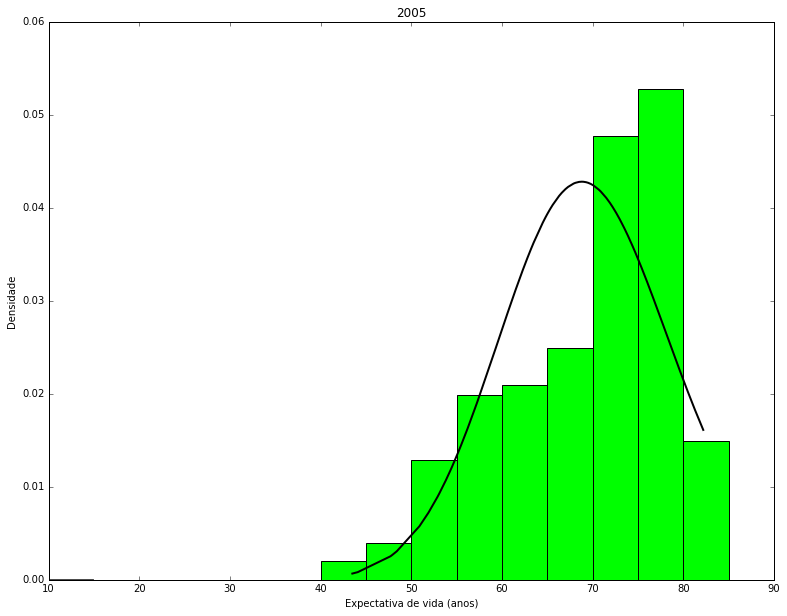

In [57]:
plot = dd.A2005.plot.hist(bins = faixa, title = '1820', figsize = (13, 10), alpha = 1, color = 'lime', normed = 1)
plt.plot(dd.A2005, stats.gamma.pdf(dd.A2005, a2005, loc = l2005, scale = b2005), lw = 2, alpha = 1, color = 'black')
plt.title('2005')
plt.ylabel('Densidade')
plt.xlabel('Expectativa de vida (anos)')

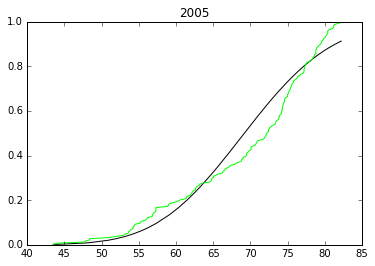

In [111]:
plt.plot(dd.A2005, stats.gamma.cdf(dd.A2005, a2005, loc = l2005, scale = b2005), color = 'black')
plt.plot(dd.A2005, fae, color = 'lime')
plt.title('2005')

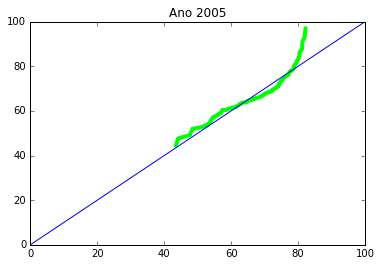

In [59]:
plt.plot(dd.A2005, stats.gamma.ppf(fae, a2005, loc = l2005, scale = b2005), lw=4, color="lime")
plt.plot((0,100),(0,100))
plt.title('Ano 2005')

___
### Cálculo de probabilidades a partir da distribuição normal

In [71]:
print('Probabilidade de um país ter expectativa de vida superior a 70 anos em 1820 é:', 
      (1 - (stats.norm.cdf(70, loc = med1820, scale = sigma1820)))*100, '%')

Probabilidade de um país ter expectativa de vida superior a 70 anos em 1820 é: 0.0 %


In [76]:
print('Probabilidade de um país ter expectativa de vida superior a 70 anos em 1950 é:', 
      int((1 - (stats.norm.cdf(70, loc = med1950, scale = sigma1950)))*100), '%')

Probabilidade de um país ter expectativa de vida superior a 70 anos em 1950 é: 3 %


In [77]:
print('Probabilidade de um país ter expectativa de vida superior a 70 anos em 2005 é:', 
      int((1 - (stats.norm.cdf(70, loc = med2005, scale = sigma2005)))*100), '%')

Probabilidade de um país ter expectativa de vida superior a 70 anos em 2005 é: 47 %


In [100]:
print('Probabilidade de um país ter expectativa menor que 75 sabendo que sua expectativa é maior que 70 em 1820:',
     ((stats.norm.cdf(75, loc = med1820, scale = sigma1820) - stats.norm.cdf(70, loc = med1820, scale = sigma1820)) / (1 - stats.norm.cdf(70, loc = med1820, scale = sigma1820)))*100,'%')

Probabilidade de um país ter expectativa menor que 75 sabendo que sua expectativa é maior que 70 em 1820: nan %


In [101]:
print('Probabilidade de um país ter expectativa menor que 75 sabendo que sua expectativa é maior que 70 em 1950:',
     ((stats.norm.cdf(75, loc = med1950, scale = sigma1950) - stats.norm.cdf(70, loc = med1950, scale = sigma1950)) / (1 - stats.norm.cdf(70, loc = med1950, scale = sigma1950)))*100, '%')

Probabilidade de um país ter expectativa menor que 75 sabendo que sua expectativa é maior que 70 em 1950: 62.5537300801 %


In [102]:
print('Probabilidade de um país ter expectativa menor que 75 sabendo que sua expectativa é maior que 70 em 2005:',
     ((stats.norm.cdf(75, loc = med2005, scale = sigma2005) - stats.norm.cdf(70, loc = med2005, scale = sigma2005)) / (1 - stats.norm.cdf(70, loc = med2005, scale = sigma2005)))*100, '%')

Probabilidade de um país ter expectativa menor que 75 sabendo que sua expectativa é maior que 70 em 2005: 43.2417204008 %


In [103]:
print ('Maior espectativa de vida dos 10% com menor espectativa de 1820:', stats.norm.ppf(0.10, loc = med1820, scale = sigma1820))

Maior espectativa de vida dos 10% com menor espectativa de 1820: 25.8523974479


In [104]:
print ('Maior espectativa de vida dos 10% com menor espectativa de 1950:', stats.norm.ppf(0.10, loc = med1950, scale = sigma1950))

Maior espectativa de vida dos 10% com menor espectativa de 1950: 33.5354209192


In [105]:
print ('Maior espectativa de vida dos 10% com menor espectativa de 2005:', stats.norm.ppf(0.10, loc = med2005, scale = sigma2005))

Maior espectativa de vida dos 10% com menor espectativa de 2005: 57.6272927083


In [107]:
print ('Menor espectativa de vida dos 10% com maior espectativa de 1820:', stats.norm.ppf(0.90, loc = med1820, scale = sigma1820))

Menor espectativa de vida dos 10% com maior espectativa de 1820: 37.2688968199


In [108]:
print ('Menor espectativa de vida dos 10% com maior espectativa de 1950:', stats.norm.ppf(0.90, loc = med1950, scale = sigma1950))

Menor espectativa de vida dos 10% com maior espectativa de 1950: 64.2086426991


In [109]:
print ('Menor espectativa de vida dos 10% com maior espectativa de 2005:', stats.norm.ppf(0.90, loc = med2005, scale = sigma2005))

Menor espectativa de vida dos 10% com maior espectativa de 2005: 81.0228465952
